In [1]:
cur_date = '091125'

library(tidyverse)
library(stringr)
library(reshape2)

arsenic_df<-read_csv("Input/Forest1_KM.csv")
citation<-arsenic_df$Citation
pre_fire<-arsenic_df$Pre_Fire
post_fire<-arsenic_df$Post_Fire
percent_change <- round(arsenic_df$Percent_Change, 2)
arsenic_df$label <- paste(arsenic_df$Water, arsenic_df$Citation, sep = "\n")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Rows: 9 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Citation, Water
dbl (3): Pre_Fire, Post_Fire, Percent_Change
lgl (2): Unburned, Burned

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
head(arsenic_df)

Citation,Water,Pre_Fire,Post_Fire,Unburned,Burned,Percent_Change,label
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<chr>
"(Mansilha et al., 2020)",Untreated Ground Water,1.6600000,0.878000000,NA,NA,-47.10843,"Untreated Ground Water (Mansilha et al., 2020)"
"(Pennino et al., 2022)",Finished Ground Water,1.3500000,1.620000000,NA,NA,20.00000,"Finished Ground Water (Pennino et al., 2022)"
"(Jankowski et al., 2023)",Finished and Untreated Ground Water,1.4000000,1.400000000,NA,NA,0.00000,"Finished and Untreated Ground Water (Jankowski et al., 2023)"
"(Burton et al., 2016)",Untreated Surface Water,0.3425714,0.008329695,NA,NA,-97.56848,"Untreated Surface Water (Burton et al., 2016)"
"(Murphy et al., 2020)",Untreated Surface Water,2.0000000,3.200000000,NA,NA,60.00000,"Untreated Surface Water (Murphy et al., 2020)"
"(Ré et al., 2020)",Untreated Surface Water,0.1970000,0.617000000,NA,NA,213.19797,"Untreated Surface Water (Ré et al., 2020)"


insert words about what this figure shows. 

In [3]:
longer_arsenic_df = arsenic_df[,c(1:4,7,8)] %>%
    pivot_longer(cols = 3:4, names_to = 'Time Point', values_to = 'As Concentration') %>%
    # cleaning up names
    separate(`Time Point`, c("Time Point", NA)) %>%
    rename(Water_Citation = label)

# putting the pre and post into a factor for ordering
longer_arsenic_df$`Time Point` = factor(longer_arsenic_df$`Time Point`, levels = c('Pre', 'Post'))

head(longer_arsenic_df)

Citation,Water,Percent_Change,Water_Citation,Time Point,As Concentration
<chr>,<chr>,<dbl>,<chr>,<fct>,<dbl>
"(Mansilha et al., 2020)",Untreated Ground Water,-47.10843,"Untreated Ground Water (Mansilha et al., 2020)",Pre,1.660
"(Mansilha et al., 2020)",Untreated Ground Water,-47.10843,"Untreated Ground Water (Mansilha et al., 2020)",Post,0.878
"(Pennino et al., 2022)",Finished Ground Water,20.00000,"Finished Ground Water (Pennino et al., 2022)",Pre,1.350
"(Pennino et al., 2022)",Finished Ground Water,20.00000,"Finished Ground Water (Pennino et al., 2022)",Post,1.620
"(Jankowski et al., 2023)",Finished and Untreated Ground Water,0.00000,"Finished and Untreated Ground Water (Jankowski et al., 2023)",Pre,1.400
"(Jankowski et al., 2023)",Finished and Untreated Ground Water,0.00000,"Finished and Untreated Ground Water (Jankowski et al., 2023)",Post,1.400


In [4]:
label_df = longer_arsenic_df %>%
            select(-`Time Point`) 

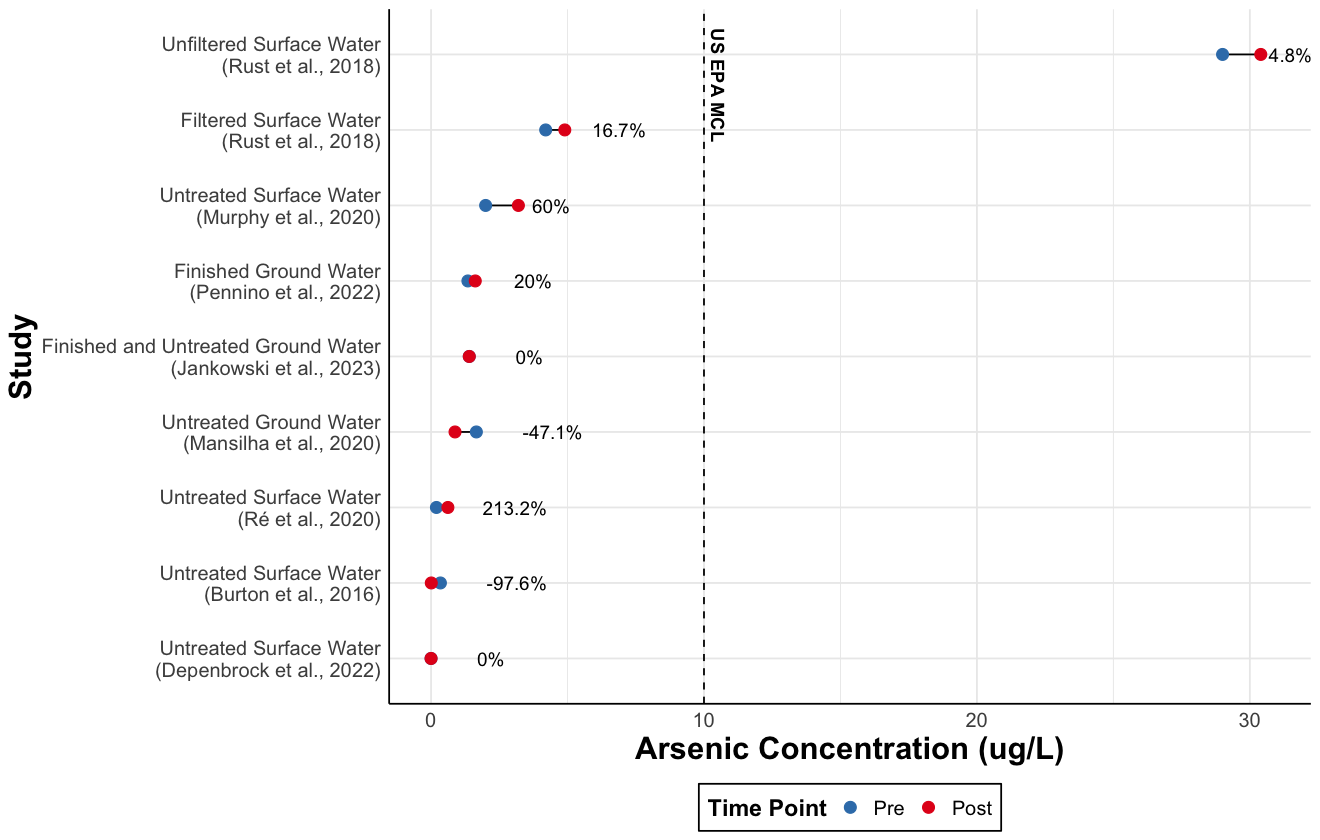

In [5]:
options(repr.plot.width=11, repr.plot.height=7) #changing size
ggplot() +
  geom_line(data = longer_arsenic_df, aes(x = `As Concentration`, y = reorder(Water_Citation, `As Concentration`))) +
  geom_point(data = longer_arsenic_df, aes(x = `As Concentration`, y = reorder(Water_Citation, `As Concentration`),
             color = `Time Point`), size = 3) +

  geom_text(data = label_df[c(1,3,5,7,9,11,13,15,17),], 
            aes(x = `As Concentration` + 1.7, y = reorder(Water_Citation, `As Concentration`), 
                label = paste0(round(Percent_Change,1), "%")), size = 4, hjust = 0, color = "black") +
  geom_vline(xintercept = 10, linetype = "dashed", color = "black", linewidth = 0.5) +
  geom_text(aes(x = 10.5, label = "US EPA MCL", y = 8.6), angle = 270, fontface = "bold") +

  theme_minimal() +

  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid')) + 

  labs(x = "Arsenic Concentration (ug/L)", y = "Study") + 
  scale_color_brewer(palette = "Set1", direction = -1)